### Exploratory Data Analysis and Data Preparation

In [134]:
# Dataframing and analysis
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
plt.style.use ('ggplot')
import seaborn as sns
%matplotlib inline
sns.set_style(style="whitegrid")

# Data cleaning and preparation for a model
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text

import nltk, string, contractions, re
from nltk.stem.porter import PorterStemmer

First read in the dataset and perform some initial exploratory analysis.

In [74]:
df = pd.read_csv('data/microwave1_df')

FileNotFoundError: [Errno 2] File data/microwave1_df does not exist: 'data/microwave1_df'

In [86]:
df.describe()

,customer_id,star_rating,helpful_votes,total_votes,review_wordcount
count,1.854000e+03,1854.000000,1854.000000,1854.000000,1854.000000
mean,3.214655e+07,3.838727,3.142395,3.662891,81.477346
std,1.474632e+07,1.500275,20.172735,21.041863,97.471815
min,8.722000e+04,1.000000,0.000000,0.000000,1.000000
25%,1.751837e+07,3.000000,0.000000,0.000000,29.000000
50%,3.307047e+07,5.000000,1.000000,1.000000,52.000000
75%,4.626587e+07,5.000000,2.000000,2.000000,94.000000
max,5.309426e+07,5.000000,589.000000,599.000000,1152.000000


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1854 entries, 0 to 1874
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        1854 non-null   int64  
 1   review_id          1854 non-null   object 
 2   product_id         1854 non-null   object 
 3   star_rating        1854 non-null   float64
 4   helpful_votes      1854 non-null   float64
 5   total_votes        1854 non-null   float64
 6   verified_purchase  1854 non-null   object 
 7   review_headline    1854 non-null   object 
 8   review_body        1854 non-null   object 
 9   review_date        1854 non-null   object 
 10  review_wordcount   1854 non-null   int64  
 11  clean_review       1854 non-null   object 
 12  model_ready        1854 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 202.8+ KB


In [88]:
df.head()

,customer_id,review_id,product_id,star_rating,helpful_votes,total_votes,verified_purchase,review_headline,review_body,review_date,review_wordcount,clean_review,model_ready
0,44300577,R2ZU11YALTJNZX,B0009KMYHI,1.0,0.0,0.0,Y,I have had this microwave for just over 3 year...,I have had this microwave for just over 3 year...,2015-08-31,91,I have had this microwave for just over 3 year...,door close know door closed turn irritating ha...
1,50952586,RVBITZNBVJ8AI,B0009KMYHI,5.0,0.0,0.0,Y,It takes a good bit of room on the counter,Man this thing cooks evenly and fast! It takes...,2015-08-30,23,Man this thing cooks evenly and fast! It takes...,man cook evenly fast bit room counter room spa...
2,31144708,R44LZL0OR5EWP,B0009KMYDM,5.0,0.0,0.0,Y,Five Stars,Works great! Have had it over a year and no su...,2015-08-30,17,Works great! Have had it over a year and no su...,surprise large microwav
3,14667788,RPWWYNUD9X64U,B0009KMYHI,5.0,0.0,0.0,Y,... received this several years ago and it sti...,I ordered and received this several years ago ...,2015-08-29,13,I ordered and received this several years ago ...,ordered received ago
4,25468208,RS76DCCGM685B,B0009KMYGY,1.0,3.0,3.0,Y,Avoid Panasonic - Doors Don't Close,I have had this microwave for just over 2 year...,2015-08-28,131,I have had this microwave for just over 2 year...,door close know door closed turn google proble...


Reviewing the values and counts that are within each column. This will help us identify where to focus the bulk of our analysis, making EDA more productive.

In [85]:
for column in df.columns:
    print(column)
    print()
    print(df[column].value_counts())
    print('_______________________________')

customer_id

40171043    2
53063359    2
13300281    2
29696737    2
52901539    2
           ..
50336515    1
31144708    1
35738373    1
49175304    1
27582464    1
Name: customer_id, Length: 1848, dtype: int64
_______________________________
review_id

R15TIVCD53EFVU    1
R3D3NI6Y4OLI2K    1
R2T61K8VPSRBYJ    1
R2CWN24FGQA0R4    1
RKIMPEL3YXIJO     1
                 ..
R3LB2ZA7MGOJBX    1
RX9IKHT5NTC6Y     1
RXX8UXD1845FL     1
R31341LNU8GAPK    1
RXY4NTRHJUN3D     1
Name: review_id, Length: 1854, dtype: int64
_______________________________
product_id

B0009KMYHI    657
B0009KMYDW    538
B0009KMYGY    347
B0009KMYDM    312
Name: product_id, dtype: int64
_______________________________
star_rating

5.0    966
4.0    332
1.0    285
2.0    139
3.0    132
Name: star_rating, dtype: int64
_______________________________
helpful_votes

0.0      901
1.0      422
2.0      232
3.0       89
4.0       43
5.0       36
6.0       16
7.0       14
10.0      11
8.0        9
11.0       8
15.0       

With the above we can see there are some data features that are redundant and not important for our purposes in this analysis.

Those include:
- 'product_parent'
- 'product_title'
- 'product_category'
- 'vine'

Date is not in the preferred format. Use the following to change it into a timestamp type.

In [90]:
type(df.review_date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [89]:
df.review_date = pd.to_datetime(df.review_date)
type(df.review_date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [91]:
# Get a count for all words in each review
review_text = df.review_body
review_words = review_text.str.split().str.len()
review_words

0        91
1        23
2        17
3        13
4       131
       ... 
1870     74
1871     21
1872     67
1873     20
1874    182
Name: review_body, Length: 1854, dtype: int64

We need to check the word count for our posts to ensure we have enough to create an informative model. We should aim for two sentences per review or 35 words per review as there are an average of 17.5 words per sentence.

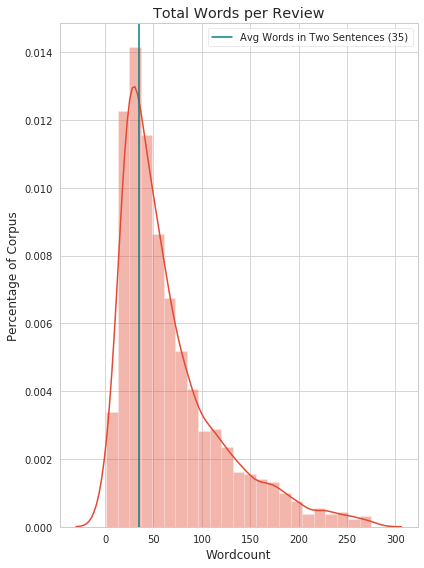

In [92]:
# Set a limit to filter out uninformative outliers.
word_std=np.std(review_words)
outlier_limit = review_words.mean()+2*word_std

# Plot our wordcount after filtering for outliers
fig, ax = plt.subplots(figsize=(6,8))
sns.distplot(review_words1[(review_words1<outlier_limit)], bins=23)
plt.axvline(35, color = 'teal', label = "Avg Words in Two Sentences (35)")
ax.set(xlabel= "Wordcount", ylabel="Percentage of Corpus")
ax.set_title("Total Words per Review")
ax.legend()
plt.tight_layout()
plt.show()

In [98]:
# Find the mean wordcount for our reviews
review_words[(review_words<(2*word_std))].mean()

60.4020979020979

Next we'll perform some further exploratory data analysis on selected columns.

In [100]:
df['review_wordcount'] = review_words
df_obj = ['marketplace', 'customer_id', 'review_id', 'product_id', 'verified_purchase',
          'review_headline', 'review_body']
df_num = df[['star_rating', 'helpful_votes', 'total_votes', 'review_date', 'review_wordcount']]

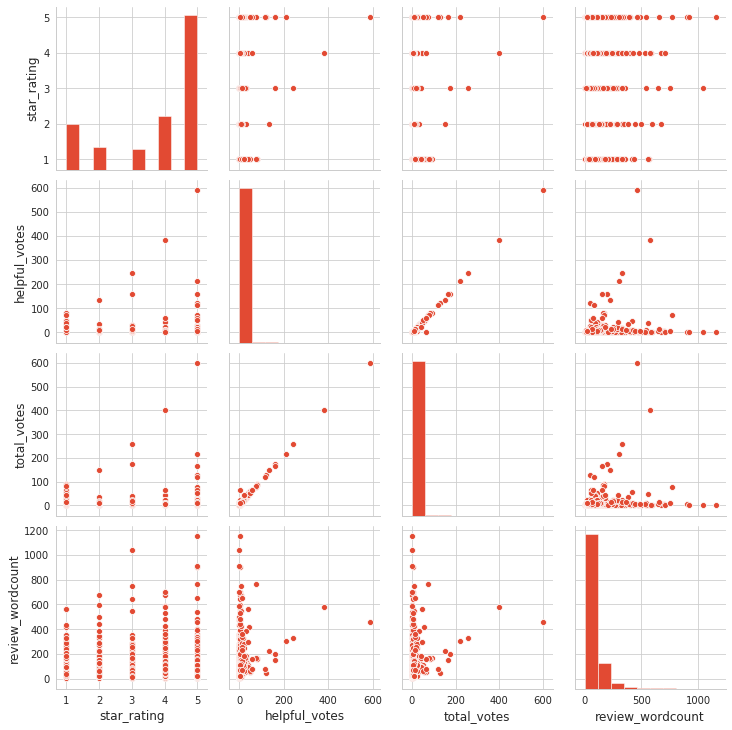

In [102]:
sns.pairplot(df_num)

We can also perform a pairplot on the same columns and integrate star_rating as a hue to check for possible inferences. Check with the below code, but it does not seem like much can be inferred through these illustrations.

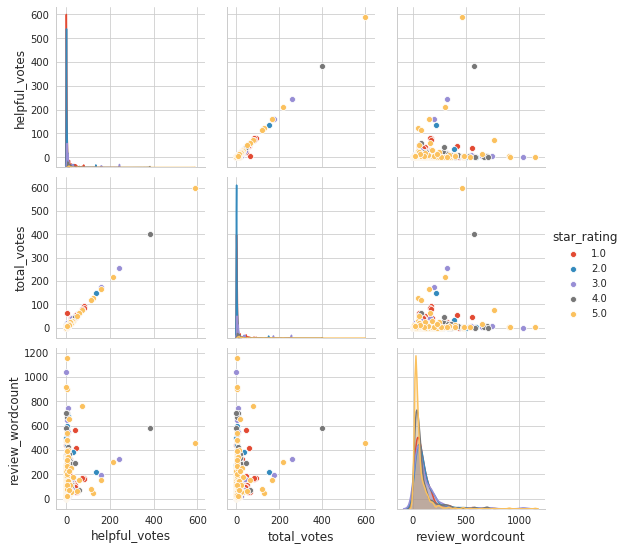

In [103]:
sns.pairplot(df_num, hue='star_rating')

The following columns are not informative for our purposes so we will drop them below:

 - marketplace
 - product_parent
 - product_title
 - product_category
 - vine

In [138]:
df.drop('marketplace', axis = 1, inplace = True)
df.drop('product_parent', axis = 1, inplace = True)
df.drop('product_title', axis = 1, inplace = True)
df.drop('product_category', axis = 1, inplace = True)
df.drop('vine', axis = 1, inplace = True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        1875 non-null   int64  
 1   review_id          1875 non-null   object 
 2   product_id         1875 non-null   object 
 3   star_rating        1875 non-null   float64
 4   helpful_votes      1875 non-null   float64
 5   total_votes        1875 non-null   float64
 6   verified_purchase  1875 non-null   object 
 7   review_headline    1875 non-null   object 
 8   review_body        1875 non-null   object 
 9   review_date        1875 non-null   object 
 10  review_wordcount   1875 non-null   int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 161.3+ KB


### Data Cleaning

Here, we will start cleaning our reviews. First, we will start creating some functions to implement on our 'review_body' column.

In [135]:
def remove_tags(text):
    '''
    Given a row, this function removes html tags in case they exist within our reviews
    '''
    TAG_RE = re.compile(r'<[^>]+>')
    return TAG_RE.sub('', text)

In [143]:
def remove_punctuations(text):
    '''
    Given a row, this function removes punctuations existing within our reviews
    '''
    punct =[]
    punct += list(string.punctuation)
    punct += '’'
    punct.remove("'")
    for punctuation in punct:
        text = text.replace(punctuation, ' ')
    return text

In [144]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    '''
    Given a row, this function will tokenize then lemmatize our reviews
    '''
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

We also need to define our stop words and our keep words. Stop words are words that will be removed from our corpus (body of text) that are redundant or non-informative. Keep words are words that we want to ensure stay out of our stop words list. This is necessary if we plan on implementing some of the traditional 'english' stop_words in pythons 'text' package.

Below I have also provided an extra list, test_stop_words. The test_stop_words list is a place for you to experiment with different stop_words you are unsure about omitting or keeping without losing track of them.

In [145]:
keep_words = ['not', 'fire', 'off']
test_stop_words = []
review_stop_words = ['panasonic', 'really', 'husband', 'thanks', 'thank', 'ha', 
              'just', 'thing', 'did', 'nn', 'wa', 'yr', 'u', 'say', 'doe',
              'mom', 'christmas', 'gift', 'got', 'way', 'le', 'daughter', "i'mwork",
              'e','not','love','good','bought','great microwave','micro','nicely',
              'great oven','microwave','product','work great','nice work', "i'm",
              'work great use','work great love','feature work great', 'genius',
              'unit work great','oven work great','easy use love','old oven',
              'old old','20 year old','unit', 'not', 'work', 'amazon', 'com', 'cu',
              'old', 'wife', 'highly', 'recommend', 'like', 'charm', 'sharp', 'ft', 
              'easy', 'oven', 'use', 'year', 'lot', 'pleased', 'happy', 'hope',
              'review', 'buy', 'far', 'day', '1', '2', '3', '4', '5', '6', '7',
              '8', '9', '10', '20', 'great', 'excellent','feature', 'nice', 'old',
              'geniusunit', "don't", "doesn't", '34', '1250', 'br', "it's", 'does',
              'doesn', 'don', 'mwork', '2.2']
for _ in text.ENGLISH_STOP_WORDS:
    if _ in keep_words:
        pass
    else:
        review_stop_words.append(_)
for _ in test_stop_words:
    review_stop_words.append(_)

The below function implements our above functions to prepare our data for our non-negative matrix factorization model. 

In [146]:
def nlp_prep(df):
    '''
    Given a column of reviews, this function will return a model ready column
    '''
    # remove html
    df['model_ready'] = df['review_body'].apply(lambda x: remove_tags(x))
    # lowercase everything
    df['model_ready'] = df['model_ready'].apply(lambda x: x.lower())
    # expand contractions
    df['model_ready'] = df['model_ready'].apply(lambda x:[contractions.fix(word) for word in x.split()])
    df['model_ready'] = [' '.join(map(str, l)) for l in df['model_ready']]
    # get rid of '\n' from whitespace 
    df['model_ready'] = df['model_ready'].apply(lambda x: x.replace('\n', ' '))
    # regex remove hyperlinks
    df['model_ready'] = df['model_ready'].str.replace('http\S+|www.\S+', '', case=False)
    # remove punctuations
    df['model_ready'] = df['model_ready'].apply(remove_punctuations)
    # remove ' s ' that was created after removing punctuations
    df['model_ready'] = df['model_ready'].apply(lambda x: str(x).replace(" s ", " "))
    # lemmatize words and return as string
    df['model_ready'] = df['model_ready'].apply(lemmatize_text).str.join(' ')
    # stem words
    df['model_ready'] = df['model_ready'].apply(PorterStemmer().stem)
    # remove stop words
    df['model_ready'] = df['model_ready'].apply(lambda x: ' '.join([word for word in x.split() if word not in (review_stop_words)]))
    return df

In [147]:
# Call our function and clean our reviews
nlp_prep(df)

,customer_id,review_id,product_id,star_rating,helpful_votes,total_votes,verified_purchase,review_headline,review_body,review_date,review_wordcount,clean_review,model_ready
0,44300577,R2ZU11YALTJNZX,B0009KMYHI,1.0,0.0,0.0,Y,I have had this microwave for just over 3 year...,I have had this microwave for just over 3 year...,2015-08-31,91,I have had this microwave for just over 3 year...,door close know door closed turn irritating ha...
1,50952586,RVBITZNBVJ8AI,B0009KMYHI,5.0,0.0,0.0,Y,It takes a good bit of room on the counter,Man this thing cooks evenly and fast! It takes...,2015-08-30,23,Man this thing cooks evenly and fast! It takes...,man cook evenly fast bit room counter room spa...
2,31144708,R44LZL0OR5EWP,B0009KMYDM,5.0,0.0,0.0,Y,Five Stars,Works great! Have had it over a year and no su...,2015-08-30,17,Works great! Have had it over a year and no su...,surprise large microwav
3,14667788,RPWWYNUD9X64U,B0009KMYHI,5.0,0.0,0.0,Y,... received this several years ago and it sti...,I ordered and received this several years ago ...,2015-08-29,13,I ordered and received this several years ago ...,ordered received ago
4,25468208,RS76DCCGM685B,B0009KMYGY,1.0,3.0,3.0,Y,Avoid Panasonic - Doors Don't Close,I have had this microwave for just over 2 year...,2015-08-28,131,I have had this microwave for just over 2 year...,door close know door closed turn google proble...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1870,33705501,R34GY91QSWWUE4,B0009KMYGY,4.0,60.0,64.0,N,Just right for me...,The Panasonic NN-H765WF was exactly what I was...,2006-03-23,74,The Panasonic NN-H765WF was exactly what I was...,h765wf exactly looking wanted white match appl...
1871,39268146,R7N1LRCV8GU6L,B0009KMYHI,5.0,5.0,10.0,Y,good looking-good cooking,this microwave cooks food very evenly-no need ...,2006-03-19,21,this microwave cooks food very evenly-no need ...,cook food evenly need stir think best looking ...
1872,19314267,R15KWS9QSI7URC,B0009KMYDM,5.0,12.0,13.0,Y,Panasonic NN-H965WF Luxury full-size 2.2 cu.ft...,"its a great microwave , i use it every day , i...",2006-03-16,67,"its a great microwave , i use it every day , i...",large fit heat evenly unlike defrosting fast m...
1873,11400155,RK5HSUM1GNRH8,B0009KMYDM,5.0,4.0,9.0,N,Panasonic Microwave Oven NN-965WF,Have had it for only a short time but it has p...,2006-02-24,20,Have had it for only a short time but it has p...,short time performed flawlessly purchas


Our data is prepare to implement our model now, so let's save it to a csv. Upon saving, move the file from the home folder to the '/data' folder.

In [222]:
model_ready_data=df
model_ready_data.to_csv('../data', index=False)

In [221]:
df = pd.read_csv('model_ready_data')

FileNotFoundError: [Errno 2] File model_ready_data does not exist: 'model_ready_data'

In [59]:
def get_top_n_words(corpus, n=None):
    '''
    Given a body of text, returns the n number of most frequent unigrams
    '''
    vec = CountVectorizer(stop_words=review_stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [60]:
def get_top_n_bigram(corpus, n=None):
    '''
    Given a body of text, returns the n number of most frequent bigrams
    '''    
    vec = CountVectorizer(ngram_range=(2, 2), stop_words=review_stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [61]:
def get_top_n_trigram(corpus, n=None):
    '''
    Given a body of text, returns the n number of most frequent trigrams
    ''' 
    vec = CountVectorizer(ngram_range=(3, 3), stop_words=review_stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

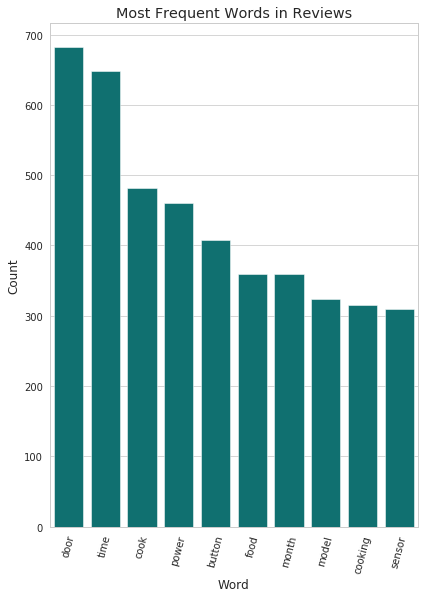

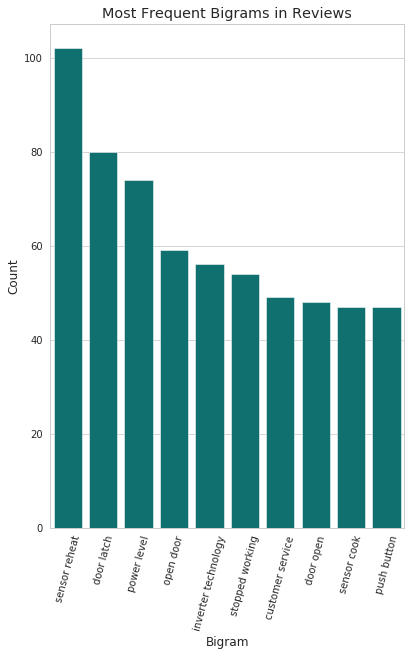

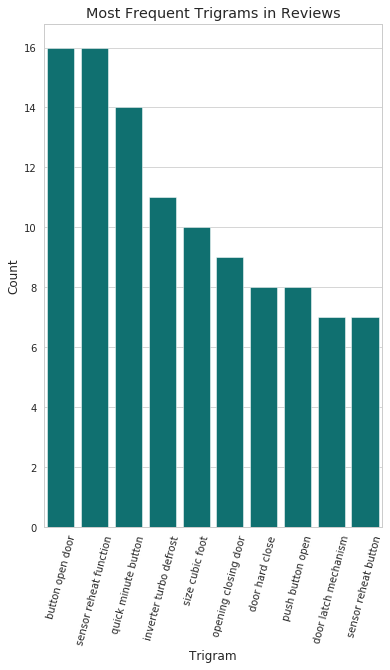

In [178]:
common_words = get_top_n_words(df['model_ready'], 10)
common_bigrams = get_top_n_bigram(df['model_ready'], 10)
common_trigrams = get_top_n_trigram(df['model_ready'], 10)

df_uni = pd.DataFrame(common_words, columns = ['Word' , 'Count'])
df_bi = pd.DataFrame(common_bigrams, columns = ['Bigram' , 'Count'])
df_tri = pd.DataFrame(common_trigrams, columns = ['Trigram' , 'Count'])

fig, ax = plt.subplots(figsize=(6,8))
sns.barplot(x= 'Word', y = 'Count', data = df_uni, color = 'teal' )
ax.set_title("Most Frequent Words in Reviews")
plt.tight_layout()
plt.xticks(rotation=75)

fig, ax = plt.subplots(figsize=(6,8))
sns.barplot(x= 'Bigram', y = 'Count', data = df_bi, color = 'teal')
ax.set_title("Most Frequent Bigrams in Reviews")
plt.tight_layout()
plt.xticks(rotation=75)

fig, ax = plt.subplots(figsize=(6,8))
sns.barplot(x= 'Trigram', y = 'Count', data = df_tri, color = 'teal')
ax.set_title("Most Frequent Trigrams in Reviews")
plt.tight_layout()
plt.xticks(rotation=75)

plt.show()